## 数据挖掘、机器学习算法实习生需求分析  

  
  接上篇文章的“实习僧网站”数据爬取，这篇文章主要对“实习僧网站”招聘数据挖掘、机器学习的实习岗位信息进行分析。数据主要来自“数据挖掘”、“机器学习”和“算法”这3个关键词下的数据。爬下来的原始数据还比较脏，本文使用pandas进行数据处理和分析，结合seaborn和pyecharts包进行数据可视化。Python运行版本为3.6.3。

### 分析目标
1. 由于小E想要找的实习公司是机器学习算法相关的工作，所以只对“数据挖掘”、“机器学习”、“算法”这三个关键字进行了爬取；
2. 因此，分析目标就是国内公司对机器学习算法实习生的需求状况（仅基于实习僧网站），以及公司相关的分析。

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyecharts
plt.style.use('ggplot')
%matplotlib inline

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点

### 1. 数据导入
- 把通过“数据挖掘”、“机器学习”和“算法”这3个关键词爬取到的3个csv文件数据导入为pandas DataFrame，再把他们concat起来
- 把ignore_index设置成True让其可以重新索引

In [78]:
data_dm = pd.read_csv("datamining.csv")
data_ml = pd.read_csv("machinelearning.csv")
data_al = pd.read_csv("mlalgorithm.csv")
data = pd.concat([data_dm, data_ml, data_al], ignore_index = True)

### 2. 数据基本信息和基本处理
- 随机抽取3个数据样本看数据是否导入正确
- 查看数据基本信息，看数据的行列数、数据类型是否正确、是否有重复数据，以及首先对重复数据进行处理

In [79]:
data.sample(3)

,auth_capital,city,com_class,com_fullname,com_id,com_intro,com_links,com_location,com_logo,com_name,...,job_deadline,job_detail,job_links,job_title,num_employee,released_time,tag,time_span,update_time,wage
111,注册资本：2000 万元人民币,杭州,公司类型：私营有限责任公司(自然人控股或私营性质企业控股),杭州斯凯网络科技有限公司,注册号：330108000005379,人人尽享移动生活,https://www.shixiseng.com/com/com_5fdoz7rla1ro,杭州市西湖区紫荆花路2号联合大厦B座10F,https://sxsimg.xiaoyuanzhao.com/A1/73/A1C9CB89...,斯凯网络,...,2018-04-14,"['岗位职责', '、负责公司医疗及其他项目的现场数据开发工作；', '、负责用户需求的满足...",https://www.shixiseng.com/intern/inn_qmfyym6smqbj,数据开发工程师,500-2000人,2天前,数据挖掘,7个月,2018-03-19 09:34:25,100-148/天
391,注册资本：1000万人民币,上海漕河泾开发区,公司类型：有限责任公司,上海触宝信息技术有限公司,注册号：310104000513388,创新型的高科技企业,https://www.shixiseng.com/com/com_ucz9bab6omrk,深圳市南山区科技园科技路9号图道科技大厦,https://sxsimg.xiaoyuanzhao.com/EC/10/EC71FF14...,触宝,...,2018-04-16,"['岗位职责：', '1.负责自然语义理解的研发工作；', '2.负责相关语料库/知识库的采...",https://www.shixiseng.com/intern/inn_olm8lioz6itd,自然语言处理工程师,150-500人,5小时前,算法,6个月,2018-03-22 10:24:54,200-260/天
810,注册资本：500 万元人民币,杭州,公司类型：私营有限责任公司(自然人控股或私营性质企业控股),杭州光珀智能科技有限公司,注册号：330106000408888,技术全球领先，团队来自浙大及海外核心人才,https://www.shixiseng.com/com/com_wfffyl8hfcji,杭州市石祥西路859号紫金创业园B座13楼,https://sxsimg.xiaoyuanzhao.com/62/9E/62BF03CA...,光珀,...,2018-11-30,"['毕业后可留任公司发展', '岗位职责：', '1、基于深度相机的图像预处理；', '2、...",https://www.shixiseng.com/intern/inn_hilvgcfjm0vs,图像算法工程师,50-150人,1周前,算法,15个月,2018-03-12 18:32:19,200-400/天


随机抽取一个数据，看看这个数据样本所有特征的数据类型

In [80]:
data.loc[666]

auth_capital                                      注册资本：130.2083万人民币
city                                                             上海
com_class                                 公司类型：股份有限公司(台港澳与境内合资、未上市)
com_fullname                                         纵目科技（上海）股份有限公司
com_id                                            组织机构代码：06087276-7
com_intro                               成为立足中国面向世界的从辅助驾驶到自动驾驶的技术引领者
com_links            https://www.shixiseng.com/com/com_k0gejst3xf8x
com_location                                北京市昌平区回龙观东大街腾讯总创空间B座535
com_logo          https://sxsimg.xiaoyuanzhao.com/7B/C2/7B75BE25...
com_name                                                       纵目科技
com_website                               http://www.zongmutech.com
com_welfare       ['发展潜力大', '活跃的工作环境', '团队体验', '棒棒的', '开放创新', '追...
day_per_week                                                   4天/周
detailed_intro    \n纵目科技成立于2013年1月，总部位于上海浦东张江高科技园区，在北京及深圳分别设有研发分...
est_date                                        

获取数据的基本信息，发现：
1. 一共有978条记录，27列
2. 某些列比如说“com_id”、“detailed_intro”、“est_date”等，具有些许缺失值
3. 所有数据都被导入成了object类型

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   auth_capital    906 non-null    object
 1   city            974 non-null    object
 2   com_class       954 non-null    object
 3   com_fullname    974 non-null    object
 4   com_id          906 non-null    object
 5   com_intro       974 non-null    object
 6   com_links       978 non-null    object
 7   com_location    978 non-null    object
 8   com_logo        974 non-null    object
 9   com_name        974 non-null    object
 10  com_website     865 non-null    object
 11  com_welfare     978 non-null    object
 12  day_per_week    978 non-null    object
 13  detailed_intro  912 non-null    object
 14  est_date        906 non-null    object
 15  industry        960 non-null    object
 16  job_academic    978 non-null    object
 17  job_deadline    978 non-null    object
 18  job_detail

- 由于数据是通过3个关键词搜索爬取的，难免会有一个职位对应多个关键词的情况，所以难免会有重复数据  
- 这些重复数据对于我们的分析没有帮助，先drop掉，再看剩余数据情况
- 由于“job_links”字段（工作详情链接）对数据可以起唯一标识作用，所以可以基于该字段去重
- 发现数据剩余878行（说明刚好有100条重复数据）

In [82]:
data.drop_duplicates(subset='job_links', inplace=True)
data.shape

(878, 27)

### 3. 数据处理
由上可见：
- com_fullname、com_name、job_academic、job_links、tag不需要处理
- “auth_capital”（注册资本）、“day_per_week”（每周工作天数）、“num_employee”（公司规模）、“time_span”（实习月数）、“wage”（每天工资）等字段，都可以处理成数值型数据
- “est_date”（公司成立日期）、“job_deadline”（截止时间）、“released_time”（发布时间）、“update_time”（更新时间）等字段，可以处理成datetime类型数据
- “city”（城市）、“com_class”（公司类型）、“com_intro（公司简介）”、“job_title”（职位名称）等字段可以进一步处理
- 类似于“com_logo”（公司logo）、“industry”（行业）等字段，可以视情况处理
- com_id、com_links、com_location、com_website、com_welfare、detailed_intro、job_detail在本次分析中用不上，不处理

#### 3.1 新建data_clean数据框
- 新建data_clean数据框，数据处理在data_clean上进行
- data_clean用以保存处理好的数据，原数据data用以保存原始数据记录
- 把本次分析中用不上的字段先drop掉

In [83]:
data_clean = data.drop(['com_id', 'com_links', 'com_location', 'com_website', 
                 'com_welfare', 'detailed_intro', 'job_detail'], axis = 1)

#### 3.2 数值型数据处理
包括“auth_capital”（注册资本）、“day_per_week”（每周工作天数）、“num_employee”（公司规模）、“time_span”（实习月数）、“wage”（每天工资）等字段  

##### 3.2.1 “auth_capital”（注册资本）
- 随机抽取“auth_capital”，发现该字段的格式基本为：“注册资本：（数字）万|万元（币种）”，有少许的格式为：“注册资本：（币种）（数字）万|万元”， 或者“注册资本：无”，或者该字段为缺失值
- 币种有人民币、美元、欧元、港元（港币）等
- 这里的处理思路是先把“注册资本：”清理掉，再把数值型数据提取出来，然后根据各币种的汇率，把注册资本转换为“万元人民币”单位

In [84]:
data.auth_capital.sample(20)

569                    NaN
528      注册资本：1476.92万元人民币
347          注册资本：1500万人民币
84        注册资本：1000 万元 人民币
865         注册资本：306 万元 美元
417            注册资本：100 万元
193          注册资本：2000万人民币
67       注册资本：5884.804万人民币
950         注册资本：4000万元人民币
484         注册资本：100 万元 美元
85             注册资本：480万美元
426            注册资本：80万人民币
672           注册资本：2105 万元
424        注册资本：100 万元 人民币
936       注册资本：87.2629万人民币
823         注册资本：1230万元人民币
70           注册资本：6000万人民币
9           注册资本：3000万元人民币
941    注册资本：14503.125万元人民币
812           注册资本：1900 万元
Name: auth_capital, dtype: object

- 先以“：”分割字符串，便可把“注册资本：”清理掉，保留数值和币种

In [85]:
auth_capital = data['auth_capital'].str.split('：', expand = True)
auth_capital.sample(5)

,0,1
508,注册资本,500万元人民币
111,注册资本,2000 万元人民币
696,注册资本,3000万
648,注册资本,1023.7388万人民币元
761,注册资本,560000万元人民币


- 接着把数字提取出来， 转换为float型

In [86]:
auth_capital['num'] = auth_capital[1].str.extract('([0-9.]+)', expand=False).astype('float')
auth_capital.sample(5)

,0,1,num
359,注册资本,36409.6355 万元 人民币,36409.6355
37,注册资本,5000万人民币,5000.0000
199,注册资本,1190.476200万人民币,1190.4762
849,注册资本,306 万元 美元,306.0000
847,注册资本,1000 万元 人民币,1000.0000


- 币种的描述比较乱，比如同是人民币，描述有“万人民币”、“万元人民币”、“万人民币元”、“万元 人民币”等
- 先看看币种的描述都有哪些（以“万”字分割字符串，便可把数值和币种分开来）

In [87]:
auth_capital[1].str.split('万', expand = True)[1].unique()

array(['美元', '人民币', '元美元', nan, '元人民币', '人民币元', '元', None, '元 人民币', '',
       '元 美元', '元港元（港币）', '港币', '香港元', '欧元', '元 港元（港币）'], dtype=object)

- 币种的描述有多种， 我们可以根据不同币种，在数值上乘以相应的汇率，转换为“万元人民币”单位
- 为了过程更好理解，可以先新建一个“ex_rate”（汇率）列，保存对应的汇率，由于数据量不大，这里用pd.Series.apply(function)（当然也可以使用pd.DataFrame.apply(function)一步到位）
- 港币、美元、欧元兑人民币的汇率分别为 0.80、6.29、7.73

In [88]:
def get_ex_rate(string):
    if string == None:
        return np.nan
    if '人民币' in string:
        return 1.00
    elif '港' in string:
        return 0.80
    elif '美元' in string:
        return 6.29
    elif '欧元' in string:
        return 7.73
    elif '万' in string:
        return 1.00
    else:
        return np.nan
    
auth_capital['ex_rate'] = auth_capital[1].astype(str).apply(get_ex_rate)
auth_capital.sample(5)

,0,1,num,ex_rate
421,注册资本,3215万美元,3215.0000,6.29
250,NaN,NaN,NaN,NaN
352,注册资本,5000万元人民币,5000.0000,1.00
252,注册资本,524.8332 万元 美元,524.8332,6.29
503,注册资本,500万元人民币,500.0000,1.00


- 由'num'和'ex_rate'相乘便是转换为“万元人民币”的注册资本字段
- 把干净的数据保存进data_clean中，方便之后分析

In [89]:
data_clean['auth_capital'] = auth_capital['num'] * auth_capital['ex_rate']
data_clean['auth_capital'].head()

0    235875.0000
1     27570.9972
2       314.5000
3     28430.8000
4     28430.8000
Name: auth_capital, dtype: float64

##### 3.2.2 “day_per_week”（每周工作天数）
由下可见：
- “day_per_week”字段没有缺失值，并且取值在“2-6天/周”之间
- 可以采用直接赋值的方法处理该字段

In [90]:
data.day_per_week.unique()#去重合并成数组

array(['4天/周', '5天/周', '3天/周', '2天/周', '6天/周'], dtype=object)

In [91]:
data_clean.loc[data['day_per_week'] == '2天/周', 'day_per_week'] = 2
data_clean.loc[data['day_per_week'] == '3天/周', 'day_per_week'] = 3
data_clean.loc[data['day_per_week'] == '4天/周', 'day_per_week'] = 4
data_clean.loc[data['day_per_week'] == '5天/周', 'day_per_week'] = 5
data_clean.loc[data['day_per_week'] == '6天/周', 'day_per_week'] = 6

##### 3.2.3 “num_employee”（公司规模）
- 同样，由于“num_employee”字段取值在['2000人以上', '500-2000人', nan, '50-150人', '15-50人', '150-500人', '少于15人', '5000人以上']，可以采用跟“day_per_week”字段一样的处理方法
- '少于15人'、'15-50人'、'50-150人'都记为'小型企业','150-500人'、'500-2000人'记为'中型企业'，'2000人以上'、'5000人以上'记为大型企业

In [92]:
data.num_employee.unique()#去重合并成数组

array(['2000人以上', '500-2000人', nan, '50-150人', '15-50人', '150-500人',
       '少于15人', '5000人以上'], dtype=object)

In [93]:
data_clean.loc[data['num_employee'] == '少于15人', 'num_employee'] = '小型企业'
data_clean.loc[data['num_employee'] == '15-50人', 'num_employee'] = '小型企业'
data_clean.loc[data['num_employee'] == '50-150人', 'num_employee'] = '小型企业'
data_clean.loc[data['num_employee'] == '150-500人', 'num_employee'] = '中型企业'
data_clean.loc[data['num_employee'] == '500-2000人', 'num_employee'] = '中型企业'
data_clean.loc[data['num_employee'] == '2000人以上', 'num_employee'] = '大型企业'
data_clean.loc[data['num_employee'] == '5000人以上', 'num_employee'] = '大型企业'
data_clean.loc[data['num_employee'].isna(), 'num_employee'] = np.nan

##### 3.2.4 “time_span”（实习月数）
由下可知：
- “time_span”字段没有缺失值，由“1-18个月”组成
- 当然，你也可以通过跟上面一样的处理方式来处理，但是，这种方式对于取值多的字段来说，第一比较繁琐，第二，其实这个赋值方式本身的运行速度很慢
- 可以考虑构造一个字典，通过pd.Series.map() 也就是映射的方式来做，方便快捷

In [94]:
data.time_span.unique()

array(['3个月', '4个月', '6个月', '7个月', '5个月', '9个月', '8个月', '10个月', '12个月',
       '13个月', '18个月', '14个月', '16个月', '11个月', '15个月', '2个月', '17个月',
       '1个月'], dtype=object)

In [95]:
mapping = {}
for i in range(1,19):
    mapping[str(i) + '个月'] = i
print(mapping)

{'1个月': 1, '2个月': 2, '3个月': 3, '4个月': 4, '5个月': 5, '6个月': 6, '7个月': 7, '8个月': 8, '9个月': 9, '10个月': 10, '11个月': 11, '12个月': 12, '13个月': 13, '14个月': 14, '15个月': 15, '16个月': 16, '17个月': 17, '18个月': 18}


In [96]:
data_clean['time_span'] = data['time_span'].map(mapping)#map函数可以用于字典映射
data_clean.head(3)#取前三行

,auth_capital,city,com_class,com_fullname,com_intro,com_logo,com_name,day_per_week,est_date,industry,job_academic,job_deadline,job_links,job_title,num_employee,released_time,tag,time_span,update_time,wage
0,235875.0000,北京,公司类型：有限责任公司(台港澳法人独资),淘宝（中国）软件有限公司,淘宝网是亚太地区较大的网络零售、商圈,https://sxsimg.xiaoyuanzhao.com/FB/BC/FBDB6AC6...,淘宝,4,成立日期：2004-12-07,计算机/互联网,硕士,2018-04-13,https://www.shixiseng.com/intern/inn_g2vpcs8lukcr,【淘宝】算法工程师/算法专家,大型企业,7分钟前,数据挖掘,3,2018-03-21 10:48:06,200-201/天
1,27570.9972,上海,公司类型：股份有限公司(上市),游族网络股份有限公司,全球领先的互动娱乐供应商,https://sxsimg.xiaoyuanzhao.com/BD/6D/BD305709...,游族网络,5,成立日期：1995-09-22,计算机/互联网,本科,2020-12-31,https://www.shixiseng.com/intern/inn_46watgzrvqsg,大数据挖掘工程师 （2018校园）,中型企业,18分钟前,软件,4,2018-03-21 10:37:22,160-280/天
2,314.5000,广州,公司类型：有限责任公司(台港澳法人独资),广州网易互动娱乐有限公司,国内中国领先的互联网技术公司，游戏行业领导者。,https://sxsimg.xiaoyuanzhao.com/company_logo/2...,网易游戏,4,成立日期：2002-10-15,互联网,本科,2018-03-31,https://www.shixiseng.com/intern/inn_wnfrd8o7wly2,数据挖掘研究实习生（AI方向）,大型企业,32分钟前,数据挖掘,4,2018-03-21 10:23:45,130-150/天


##### 3.2.5 “wage”（每天工资）
- 通过观察可知，该字段没有缺失值，并且格式全都为：xxx-xxx/天
- 可以取一个最低工资，一个最高工资，再求一个平均工资
- 这里，可以用之前的pd.Series.apply(function)来做，即定义一个函数提取每条记录中的工资最小和最大值
- 不过，更加简便的方法肯定是正则提取啊

In [97]:
data['wage'].sample(5)

368    200-300/天
126    200-400/天
148    100-200/天
745    100-200/天
486    200-300/天
Name: wage, dtype: object

这一步我估计需要解释一下：
- 首先使用正则'([0-9.]+)-([0-9.]+)/天'提取出两列数字（也就是最低和最高工资），设置expand=True返回一个数据框
- 由于返回回来的是字符串格式，需要把它们转换为整型（int），所以使用astype('int')
- 最后，对每行记录求平均，返回一个Series赋值给data_clean['average_wage']

In [98]:
data_clean['average_wage'] = data['wage'].str.extract('([0-9.]+)-([0-9.]+)/天', expand=True).astype('int').mean(axis = 1)
#先用正则求出最小和最大值，转换为int类型，且按照行进行求平均
data_clean['average_wage'].head()

0    200.5
1    220.0
2    140.0
3    175.0
4    175.0
Name: average_wage, dtype: float64

#### 3.3 时间数据处理
包括“est_date”（公司成立日期）、“job_deadline”（截止时间）、“released_time”（发布时间）、“update_time”（更新时间）等字段  

##### 3.3.1 “est_date”（公司成立日期）
- 随机抽取发现“est_date”这个字段的格式为：成立日期：xxxx-xx-xx
- 因此，直接正则提取，然后把它转换为datetime格式就可以了

In [99]:
data['est_date'].sample(5)

343    成立日期：2007-07-03
886    成立日期：2016-08-16
622    成立日期：2007-08-13
390    成立日期：2012-03-22
718    成立日期：2011-07-07
Name: est_date, dtype: object

In [100]:
data_clean['est_date'] = pd.to_datetime(data['est_date'].str.extract('成立日期：([0-9-]+)', expand=False))#expand是不作分割的
data_clean['est_date'].sample(5)

122   2005-04-11
819   2015-08-03
859   2000-08-09
546          NaT
812   2010-11-24
Name: est_date, dtype: datetime64[ns]

##### 3.3.2 “job_deadline”（截止时间）
- 这个字段很干净，直接类型转换便可

In [101]:
data['job_deadline'].sample(5)

715    2018-09-30
500    2018-04-04
777    2018-03-27
501    2018-04-04
192    2018-04-06
Name: job_deadline, dtype: object

In [102]:
data_clean['job_deadline'] = pd.to_datetime(data['job_deadline'])#将string格式转换为日期格式

##### 3.3.3 “released_time”（发布时间）
- 观察数据发现，该字段1小时内的都以分钟表示、1小时-2天内的都以小时表示、2天-1周内的都以天表示，1周-1个月内的都以周表示，1个月以上的以月表示
- 可以考虑清洗成：2天以内是最新的（newest），2天-1周是新的（new），1周-1个月是可以投简历的（acceptable），1个月以上的是旧的（old）
- 这个的处理方法很多，我的方法是先把每条记录中的分钟、小时、天、周、月提取出来，再定义一个映射map一下就可以了

In [103]:
data['released_time'].sample(5)

303      6天前
88     44小时前
598      2天前
180      1周前
493    28小时前
Name: released_time, dtype: object

In [104]:
data_clean['released_time'] = data['released_time'].str.extract('[0-9-]+(\w+)前', expand=False).map(
    {'分钟':'newest', '小时':'newest', '天':'new', '周':'acceptable', '月':'old'})
    #可以直接把map字典的内容放进去应用，我们主要是正则取单位
data_clean['released_time'].sample(5)

444        newest
569           new
619           new
229           old
859    acceptable
Name: released_time, dtype: object

##### 3.3.4 “update_time”（更新时间）
- 更新时间字段格式很工整，直接转换类型便可

In [105]:
data['update_time'].sample(5)

92     2018-03-19 13:54:51
233    2018-01-26 11:06:24
239    2017-12-29 15:00:46
689    2018-03-19 09:29:29
800    2018-03-13 10:40:42
Name: update_time, dtype: object

In [106]:
data_clean['update_time'] = pd.to_datetime(data['update_time'])#转换成日期格式

#### 3.4 字符型数据处理
包括“city”（城市）、“com_class”（公司类型）、“com_intro（公司简介）”、“job_title”（职位名称）等字段

##### 3.4.1 “city”（城市）处理
- 乍一看这个字段还挺整洁的，取唯一值看一下发现有些城市还是需要稍微处理一下
- 比如说成都有“成都市”和“成都”，珠海有“珠海市”和“珠海”等
- 直接赋值处理

In [107]:
data['city'].unique()#依然是去重合并成数组

array(['北京', '上海', '广州', nan, '南京', '深圳', '宁波', '杭州', '西安', '成都', '合肥',
       '珠海市', '其他', '重庆', '武汉', '无锡', '天津', '珠海 深圳', '长沙', '厦门', '珠海',
       '济南', '香港', '苏州', '上海漕河泾开发区', '晋江', '东莞', '成都市', '大连', '福州', '沈阳'],
      dtype=object)

In [108]:
data_clean.loc[data_clean['city'] == '成都市', 'city'] = '成都'#需要替换里面的内容可以用loc，里面就是判断+要更改的字段
data_clean.loc[data_clean['city'].isin(['珠海市', '珠海 深圳', '珠海']), 'city'] = '珠海'
data_clean.loc[data_clean['city'] == '上海漕河泾开发区', 'city'] = '上海'

- 忍不住好奇心，先看一下招聘“机器学习算法”实习生前10的城市
- 发现北京遥遥领先、接着是上海、杭州、深圳、广州

<AxesSubplot:>

/Users/chenqiang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chenqiang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chenqiang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chenqiang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 28023 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chenqiang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chenqiang/opt/anaconda3/lib/python3.9/

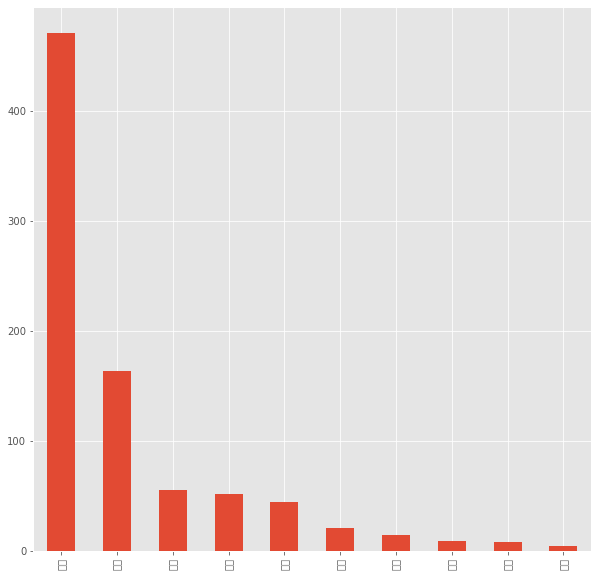

In [109]:
data_clean['city'].value_counts().nlargest(10).plot(kind = 'bar')
#取前10的实习生人数的所在城市

#### 3.4.2 “com_class”（公司和企业类型）处理
- 类型有很多，可以按照组织形式可以分为独资企业、合伙企业、公司制企业，公司制企业又分为有限责任公司和股份有限公司等等
- 这里主要把它分为‘股份有限公司（未上市）’、‘股份有限公司（上市）’、‘有限责任公司’、‘外商投资公司’、‘有限合伙企业’、‘国有企业’这6种
- 处理方法跟上面币种的处理方法一致

- 首先看看都有哪些公司（或企业）类型

In [110]:
list(data['com_class'].unique())#直接以数组的形式呈现和不带list没什么差别

['公司类型：有限责任公司(台港澳法人独资)',
 '公司类型：股份有限公司(上市)',
 '公司类型：有限责任公司(外国法人独资)',
 nan,
 '公司类型：有限责任公司',
 '公司类型：有限责任公司（法人独资）',
 '公司类型：其他有限责任公司',
 ' ',
 '公司类型：其他股份有限公司(非上市)',
 '公司类型：有限责任公司(中外合资)',
 '公司类型：有限责任公司(自然人投资或控股)',
 '公司类型：有限责任公司(自然人独资)',
 '公司类型：有限责任公司（自然人投资或控股）',
 '公司类型：有限责任公司(法人独资)',
 '公司类型：有限责任公司分公司（自然人独资）',
 '公司类型：股份有限公司(中外合资、上市)',
 '公司类型：有限责任公司（台港澳法人独资）',
 '公司类型：有限责任公司\n',
 '公司类型：有限责任公司（自然人独资）',
 '公司类型：有限责任公司（自然人投资或控股的法人独资）',
 '公司类型：股份有限公司(非上市、自然人投资或控股)',
 '公司类型：有限责任公司(台港澳与境内合资)',
 '公司类型：无',
 '公司类型：股份有限公司分公司(上市、国有控股)',
 '公司类型：私营有限责任公司(自然人控股或私营性质企业控股)',
 '公司类型：全民所有制',
 '公司类型：有限责任公司（外国法人独资）',
 '公司类型：股份有限公司(非上市)',
 '公司类型：股份有限公司(上市、自然人投资或控股)',
 '公司类型：股份有限公司(台港澳与境内合资、上市)',
 '公司类型：其他股份有限公司(上市)',
 '公司类型：有限责任公司分公司（非自然人投资或控股的法人独资）',
 '公司类型：其他股份有限公司（上市）',
 '公司类型：有限责任公司（非自然人投资或控股的法人独资）',
 '公司类型：股份有限公司',
 '公司类型：非上市股份有限公司',
 '公司类型：分公司',
 '公司类型：股份有限公司（上市、自然人投资或控股）',
 '公司类型：有限合伙',
 '公司类型：外商投资公司分公司',
 '公司类型：有限责任公司(台港澳与外国投资者合资)',
 '公司类型：股份有限公司（非上市）',
 '公司类型：有限责任公司(外商投资企业法人独资)',
 '公司类型：上市股份有限公司',
 '公司类型：股份

- 定义一个函数处理这些类型，利用pd.Series.apply(function)方法
- 把处理好的数据保存到data_clean中

In [111]:
def get_com_type(string):
    if string == None:
        return np.nan
    elif ('非上市' in string) or ('未上市' in string):
        return '股份有限公司（未上市）'
    elif '股份' in string:
        return '股份有限公司（上市）'
    elif '责任' in string:
        return '有限责任公司'
    elif '外商投资' in string:
        return '外商投资公司'
    elif '有限合伙' in string:
        return '有限合伙企业'
    elif '全民所有' in string:
        return '国有企业'
    else:
        return np.nan
        #跟前面的取利率很像

In [112]:
# 将空值替换为默认值
data['com_class'].fillna('', inplace=True)
com_class = data['com_class'].str.split('：', expand = True)#用：分割
com_class['com_class'] = com_class[1].apply(get_com_type)#通过get_com_type进行替换
com_class.sample(5)

,0,1,com_class
444,公司类型,有限责任公司（外国法人独资）,有限责任公司
799,公司类型,有限责任公司(自然人投资或控股),有限责任公司
65,,None,NaN
967,公司类型,有限责任公司(外国法人独资),有限责任公司
2,公司类型,有限责任公司(台港澳法人独资),有限责任公司


In [113]:
data_clean['com_class'] = com_class['com_class']

- “com_intro”（公司简介）、“job_title”（职位名称）两个字段暂时不处理

#### 3.5 “com_logo”（公司logo）、“industry”（行业）也暂时不处理
- 更改一下每列的顺序
- 再把data_clean保存到本地

In [115]:
data_clean = data_clean.reindex(columns=['com_fullname', 'com_name', 'job_academic', 'job_links', 
                                         'tag','auth_capital', 'day_per_week', 'num_employee', 'time_span',
                                         'average_wage', 'est_date', 'job_deadline', 'released_time',
                                         'update_time', 'city', 'com_class', 'com_intro', 'job_title',
                                         'com_logo', 'industry'])#修改字段的顺序
data_clean.to_csv('/Users/chenqiang/Documents/interesting-python/shixiseng/data_clean.csv', index = False)

### 4. 数据分析
终于可以进入数据分析的阶段。可以利用以上的城市、薪资、学历、行业、公司等相关字段，分析出目前国内公司对机器学习算法实习生的需求状况（仅基于实习僧网站），以及公司的相关情况

- 首先，看看清洗完的数据的基本情况

#### 4.1 数据基本情况

In [116]:
data_clean.sample(3)

,com_fullname,com_name,job_academic,job_links,tag,auth_capital,day_per_week,num_employee,time_span,average_wage,est_date,job_deadline,released_time,update_time,city,com_class,com_intro,job_title,com_logo,industry
6,南京贝湾教育科技有限公司,扇贝,不限,https://www.shixiseng.com/intern/inn_r2x1jrgoaxwu,数据挖掘,250.0,4,小型企业,6,225.0,2011-06-24,2018-04-30,newest,2018-03-21 10:17:03,南京,有限责任公司,中国最大的移动互联网英语学习平台,数据工程师,https://sxsimg.xiaoyuanzhao.com/E0/13/E0E0DCED...,互联网
223,广州唯品会信息科技有限公司,唯品会,本科,https://www.shixiseng.com/intern/inn_2st43wvfsa3h,数据挖掘,82450.0,4,大型企业,3,125.0,2008-08-22,2018-03-25,acceptable,2018-02-23 11:17:37,广州,有限责任公司,全球最大的特卖电商、以及中国第三大电商,数据分析实习生（美妆海淘）,https://sxsimg.xiaoyuanzhao.com/4F/BB/4F1A8F2C...,电子商务
398,浙江核新同花顺网络信息股份有限公司,同花顺,硕士,https://www.shixiseng.com/intern/inn_lqvz1fydon8m,算法,53760.0,5,大型企业,4,170.0,2001-08-24,2018-06-30,newest,2018-03-22 09:46:56,杭州,股份有限公司（上市）,中国证券信息服务业的第一家上市公司，互联网金融上市公司,算法实习生,https://sxsimg.xiaoyuanzhao.com/3C/E6/3C3AE769...,互联网金融


In [117]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 977
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   com_fullname   874 non-null    object        
 1   com_name       874 non-null    object        
 2   job_academic   878 non-null    object        
 3   job_links      878 non-null    object        
 4   tag            878 non-null    object        
 5   auth_capital   782 non-null    float64       
 6   day_per_week   878 non-null    object        
 7   num_employee   872 non-null    object        
 8   time_span      878 non-null    int64         
 9   average_wage   878 non-null    float64       
 10  est_date       788 non-null    datetime64[ns]
 11  job_deadline   878 non-null    datetime64[ns]
 12  released_time  878 non-null    object        
 13  update_time    878 non-null    datetime64[ns]
 14  city           874 non-null    object        
 15  com_class      794 non-

很好，数据是想要的样子  
  
#### 4.2 城市与职位数量
- 其实由上面已经知道了，北上广深杭这五个城市毫无疑问地占据了前五的位置，其中北京遥遥领先，有471个职位，占53.89%；上海有164个，占18.76%；北上广深杭这五个城市占了所有的89.93%（将近九成），说明这个职位还是集中在一线城市
- 另外值得注意的是，杭州排到了第三，在广州和深圳的前面，说明杭州在这方面的发展还挺好的
- 原以为杭州的职位都被阿里系霸占了，结果抽取数据出来一看发现并没有，其中一家叫“非白三维”的公司占了10个职位，这到底是一家什么样的公司？可以去了解一下

In [118]:
city = data_clean['city'].value_counts()
city[:15]

北京    471
上海    164
杭州     55
深圳     52
广州     44
成都     21
南京     14
武汉      9
西安      8
重庆      4
苏州      4
沈阳      4
珠海      4
合肥      3
其他      2
Name: city, dtype: int64

In [119]:
from pyecharts.charts import Bar      
bar = Bar()
bar.add_xaxis(city[:15].index)
bar.add_yaxis('城市',city[:15].values)
# bar.add('', city[:15].index, city[:15].values, mark_point=["max"])

bar.render()

'/Users/chenqiang/Documents/interesting-python/shixiseng/render.html'

In [120]:
city_pct = (city/city.sum()).map(lambda x: '{:,.2%}'.format(x))
city_pct[:15]
#求出前15个城市的占比

北京    53.89%
上海    18.76%
杭州     6.29%
深圳     5.95%
广州     5.03%
成都     2.40%
南京     1.60%
武汉     1.03%
西安     0.92%
重庆     0.46%
苏州     0.46%
沈阳     0.46%
珠海     0.46%
合肥     0.34%
其他     0.23%
Name: city, dtype: object

In [121]:
(city/city.sum())[:5].sum()

0.8993135011441648

In [122]:
data_clean.loc[data_clean['city'] == '杭州', 'com_name'].value_counts()[:5]#先判断城市在杭州，并按照公司进行count，求前5个城市

非白三维    10
光珀       6
虹软       5
同花顺      4
菜鸟网络     3
Name: com_name, dtype: int64

- 再看看这15个个城市中，招聘职位数量前五的公司到底是哪些
- 通过定义一个函数topN来实现

In [123]:
def topN(dataframe, n=5):
    counts = dataframe.value_counts()
    return counts[:n]

In [124]:

data_clean.groupby('city').com_name.apply(topN).loc[list(city_pct[:15].index)]#取前15城市的数据按照城市进行groupby，取前5的公司，

city               
北京    百度               21
      滴滴出行             19
      今日头条             12
      京东金融             10
      作业帮               9
上海    华院数据             10
      爱奇艺               8
      驭势科技              7
      麦穗人工智能            4
      名片全能王             4
杭州    非白三维             10
      光珀                6
      虹软                5
      同花顺               4
      菜鸟网络              3
深圳    中科龙智             13
      Webot             4
      腾讯                3
      美图                3
      平安科技              3
广州    网易游戏              5
      探迹                4
      欢聚时代（多玩YY）        2
      景驰科技              2
      汇量科技              2
成都    天佑飞天              3
      知道创宇              2
      西纬科技              1
      果小美               1
      腾讯                1
南京    小黑鱼科技             2
      金智信息              2
      南京地平线机器人技术        2
      扇贝                1
      指食针               1
武汉    小弦科技              2
      武汉安天              1
      光庭信息        

#### 4.3 薪资

##### 4.3.1 平均薪资
- 由于"average_wage"（薪资）一列的单位是每天，所以可以跟"day_per_week"（每周天数）结合起来算每月的工资（以一个月4周算）
- 另起一列“salary”（月工资）保存数据
- 发现平均实习工资是3645元人民币，应该还是OK的噶？

In [125]:
data_clean['salary'] = data_clean['average_wage'] * data_clean['day_per_week'] * 4
data_clean['salary'].mean()

3644.9407744874716

##### 4.3.2 薪资与城市
- 以城市分组，看不同城市平均实习工资怎么样，发现薪资前五名中，北上广深杭只有杭州进入了前五，不过前五中其它四个城市的样本量都太小，数据不具有代表性
- 看看职位需求前10的城市，平均实习薪资怎么样，发现杭州是最高的，突破了4000（还算可以的噶？），紧接着是北京3790(弱弱地问一句，够房租不？)，然后是深圳、上海、南京、广州

In [126]:
salary_by_city = data_clean.groupby('city')['salary'].mean()#按照城市分组求出每个城市的平均薪资
salary_by_city.nlargest(10)#按照降序并求出前10的城市

city
晋江    9000.000000
长沙    4500.000000
东莞    4150.000000
杭州    4139.345455
福州    4000.000000
北京    3789.927813
深圳    3783.538462
苏州    3775.000000
厦门    3750.000000
上海    3579.170732
Name: salary, dtype: float64

In [145]:
top10_city = salary_by_city[city_pct.index[:10]].sort_values(ascending=False)
top10_city

杭州    4139.345455
北京    3789.927813
深圳    3783.538462
上海    3579.170732
南京    3420.857143
广州    3176.363636
成都    2850.000000
西安    2317.500000
重庆    2222.500000
武汉    1912.222222
Name: salary, dtype: float64

In [148]:
# bar = pyecharts.Bar('北上广深杭等城市平均实习工资')
# bar.add('', top10_city.index, np.round(top10_city.values, 0), mark_point=["max"], is_convert=True)
# bar


import pyecharts.options as opts
from pyecharts.globals import ThemeType
from pyecharts.charts import Bar

bar = Bar(init_opts=opts.InitOpts(theme=ThemeType.VINTAGE))
bar.add_xaxis(top10_city.index.tolist())
bar.add_yaxis('', np.round(top10_city.values, 0).tolist(),
              label_opts=opts.LabelOpts(is_show=False),
              markpoint_opts=opts.MarkPointOpts(
                  data=[opts.MarkPointItem(type_='max', name='最大值')]
              ))
bar.set_global_opts(title_opts=opts.TitleOpts(title='北上广深杭等城市平均实习工资'),
                    yaxis_opts=opts.AxisOpts(name='元/月'))
bar.render_notebook()



- 再看看这些城市实习薪资的分布怎么样

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

top10_city_box = data_clean.loc[data_clean['city'].isin(top10_city.index), :]
plt.figure(figsize=(8, 6))
sns.violinplot(x='salary', y='city', data=top10_city_box, scale='width', inner='quartile')

TypeError: No loop matching the specified signature and casting was found for ufunc add

<Figure size 576x432 with 0 Axes>

#### 4.4 学历

##### 4.4.1 数据挖掘、机器学习算法的学历要求
- 先看看总体来说，需要什么学历的最多，发现需求的本科生数量是最多的，约占50%，紧接着是硕士，约占30%，博士是最少的

In [158]:
job_academic = data_clean['job_academic'].value_counts()
job_academic

本科    435
硕士    267
不限    160
大专     12
博士      4
Name: job_academic, dtype: int64

In [162]:
# pie = pyecharts.Pie("学历要求")
# pie.add('', job_academic.index, job_academic.values)
# pie

import pyecharts.options as opts
from pyecharts.charts import Pie
job_academic = data_clean['job_academic'].value_counts()
job_academic
pie = Pie()
pie.set_global_opts(title_opts=opts.TitleOpts(title="学历要求"))
data = [(k,v) for k,v in job_academic.items()]
pie.add("", data)
pie.render_notebook()


##### 4.4.2 学历与薪资
- 再看看实习薪资和学历有什么关系。发现基本上是正相关的关系，博士最高，接着是硕士、本科、大专
- 但是，本科和硕士的实习工资差别不大
- 总体看起来实习工资都偏低一些（不知道大家的实习工资是多少呢？），就算是博士也不太高

In [ ]:
data_clean.groupby(['job_academic'])['salary'].mean().sort_values()

In [ ]:
sns.boxplot(x="job_academic", y="salary", data=data_clean)

#### 4.4 行业
- 有一个好奇是，在现在的各行各业中，哪些行业对数据挖掘、机器学习算法的实习生需求更多，还有哪些行业现在也正在应用机器学习算法
- “industry”字段是前面还未处理的，先看看数据长什么样子，发现同一条记录可能对应着一个或者多个行业，格式为xxx/xxx或者xxx,xxx，或者xxx，xxx等
- 字段存在一定的缺失值
- 考虑把字段按照/,，分割，行业名称每出现一次，做一次记录，比如“计算机/互联网,金融”，既属于“计算机”行业、又属于“互联网”行业，也属于“金融行业”，因此这3个行业的记录加1

In [ ]:
data_clean['industry'].sample(5)

In [ ]:
industry = data_clean.industry.str.split('/|,|，', expand = True)#进行分割

这里需要解释一下：
- 首先把上面split好的industry应用pandas的顶级方法value_counts，计算出每列不同行业的记录数
- 然后把这几列的数据加起来，得到总数
- 再取top15

In [ ]:
industry_top15 = industry.apply(pd.value_counts).sum(axis = 1).nlargest(15)#求出每组的记录数，并求出前15名的种类

In [ ]:
bar = pyecharts.Bar('行业与职位数量')
bar.add('', industry_top15.index, industry_top15.values, 
        mark_point=["max","min","average"], xaxis_rotate=45)
bar

由上可知：
- 互联网和计算机行业对于这方面的实习生需求是最多的（这是当然）
- 金融、通信、电子行业对于这方面的实习生需求在前五名，说明数据挖掘、机器学习算法在这些行业也得到了比较好的应用
- 另外，一些传统行业比如说机械、制造，也对这方面的实习生有些许需求，说明传统行业也开始关注和探索新的技术
- 医药行业和教育培训行业也对此有些许需求；其实医药行业对机器学习算法的探索已经很多了，教育培训呢，估计是机器学习最近几年的蓬勃发展也带动了教育培训的发展吧

#### 4.5 公司
有很多跟公司相关的字段，很好奇哪些公司现在招的实习生职位数量最多、公司规模如何、这些公司都是什么时候成立的、是不是最近几年新成立的公司占的比例比较大、哪些公司给的实习薪资高一些、哪些公司比较看重学历
  
##### 4.5.1 公司与职位数量、平均实习月薪
- 看看招聘职位数量前15名的公司都有哪些。发现了很多耳熟能详的大公司，比如说百度、滴滴、爱奇艺、头条、京东等
- 还有一些比较陌生的，比如中科龙智、华院数据、非白三维、恒润科技、驭势科技、Rokid A-Lab等，这些公司都值得去了解一下
- 这些公司中，今日头条的平均实习月薪最高，6400.5元，非白三维这家公司的实习月薪也不错，5150元，比某度好多了哈哈哈

In [ ]:
data_clean.groupby('com_name').salary.agg(['count', 'mean']).sort_values(by='count', ascending = False)[:15]
#按照公司分组，求每个公司的职位以及平均工资，然后按照职位数量排序，取前15名

##### 4.5.2 公司规模与职位数量
- 数据挖掘、机器学习的实习生的需求，是否是以大型企业为主导呢？
- 发现并不是的，这方面的需求是以小中大型企业向下递减的，也间接说明了这个行业迅速发展的同时催生了很多中小企业吧

In [ ]:
data_clean['num_employee'].value_counts()#求出每个公司大小的记录数

##### 4.5.3 公司规模与实习月薪
- 我猜应该是大公司实习月薪高，小公司实习月薪低吧
- 发现：我还是太天真了，结果刚好相反，小公司给的高，大公司给的低
- 仔细想想好像也不无道理，大公司靠自己的名气吸引实习生，小公司没有名气，只能靠给更多的钱来吸引实习生了

In [ ]:
data_clean.groupby('num_employee')['salary'].mean()#按照公司规模分组求工资的平均水平

##### 4.5.4 公司实习期长度
- 发现大多数公司要求的是实习3个月和6个月，基本上都是实习三个月起
- 平均实习期长度是五个半月

In [ ]:
data_clean['time_span'].value_counts()#按照实习时长求记录数

In [ ]:
data_clean['time_span'].mean()#求工作时长的平均数

##### 4.5.5 企业成立时间
刚好可以用企业成立时间验证一下猜想，也就是最近这个行业是否得到了迅速的成长，迅速成长的过程中，是否又催生了一大批的中小企业
- 首先，因为计算的是企业的数量而不是职位的数量，所以要先drop掉重复的企业
- 接着，把之前清理好的成立时间数据，再清理一下，以年做单位
- 然后，以年分组计算数量，便得到每年新成立的公司数量
- 发现：从2013年开始，公司呈现爆发式增长

In [ ]:
est_date = data_clean.drop_duplicates(subset='com_name')#按照公司名称干掉重复的企业

In [ ]:
import warnings
warnings.filterwarnings('ignore')
est_date['est_year'] = pd.DatetimeIndex(est_date['est_date']).year
num_com_by_year = est_date.groupby('est_year')['com_name'].count()

In [ ]:
line = pyecharts.Line("每年新成立的公司数量变化")
line.add("", num_com_by_year.index, num_com_by_year.values, mark_line=["max", "average"])
line

那新成立的企业中，企业规模怎么样？
- 把数据以企业规模和成立年份分组计数
- 发现2013年之后的爆发式增长中，主要以中小型企业为主（当然，这里也可以使用注册资本字段来做）

In [ ]:
scale_VS_year = est_date.groupby(['num_employee', 'est_year'])['com_name'].count()
scale_VS_year_s = scale_VS_year['小型企业'].reindex(num_com_by_year.index, fill_value=0)
scale_VS_year_m = scale_VS_year['中型企业'].reindex(num_com_by_year.index, fill_value=0)
scale_VS_year_l = scale_VS_year['大型企业'].reindex(num_com_by_year.index, fill_value=0)

line = pyecharts.Line("新成立的企业与规模")
line.add("小型企业", scale_VS_year_s.index, scale_VS_year_s.values, is_label_show=True)
line.add("中型企业", scale_VS_year_m.index, scale_VS_year_m.values, is_label_show=True)
line.add("大型企业", scale_VS_year_l.index, scale_VS_year_l.values, is_label_show=True)
line

### 5. 给小E挑选实习公司
从以上的数据分析我们可以知道：
1. 数据挖掘、机器学习算法岗位实习生的招聘，主要集中在“北上广深杭”这5个大城市
2. 实习生的平均薪资为3644元人民币，“北上广深杭”这五个城市中，杭州的薪资最高，再者是北京、深圳
3. 实习生学习以本科和硕士居多，并且这两者在实习薪资待遇上并没有太大的差别
4. 互联网和计算机行业对于数据挖掘、机器学习算法岗位实习生需求是最多的，再者是金融、通信、电子行业
5. 百度、滴滴、爱奇艺、头条、京东等大公司对该岗位的需求很多，另外还有中科龙智、华院数据、非白三维、恒润科技、驭势科技、Rokid A-Lab这些比较陌生的公司，对于该岗位的需求很多（应该是公司这方面的业务出于快速发展阶段）
6. 大公司的实习薪资较少，小公司的薪资较多，不过差别不大
7. 实习期以3个月或者6个月为主
8. 从2013年开始，该行业的迅速发展催生了很多新的公司，主要以中小企业为主

  
这便是实习僧网站上，国内“机器学习算法实习生”岗位的一些基本情况。下面还有一个任务就是，给小E挑选一些符合小E的公司，供小E投简历。
小E的相关信息：
- 深圳人
- 硕士在读
- 只能实习3个月
- 薪资高于深圳平均实习薪资
- 要求是最新发布的职位

  
最后剩下......鹅厂......
那就鹅厂吧，把鹅厂的这3条记录提取出来，完事儿！

In [ ]:
E_data = data_clean.loc[(data_clean['city'] == '深圳') & 
               (data_clean['job_academic'] != '博士') & 
               (data_clean['time_span'].isin([1,2,3])) & 
               (data_clean['salary'] > 3784) & 
               (data_clean['released_time'] == 'newest'), :]#loc后面就是判断语句
E_data['com_name'].unique()#去重合并成数组

In [ ]:
data.loc[E_data.index, ['job_title', 'job_links']]#找出岗位名称和岗位链接

### 6. logo拼图
最后，一个小乐趣：数据中有"com_logo"（公司logo）的链接地址，可以下载回来然后做个公司logo拼图
1. 首先，需要先按照“com_logo”字段的链接，把所有的logo图片下载回来
- 先选取“com_logo”和“com_name”两列数据，按照“com_name”列去重，去缺失值
- 由于我们要使用“com_name”字段来命名爬取回来的logo，而其有些记录带有"/"符号，跟路径的符号会起冲突，所以先把这个符号用“-”替换掉
- 接着使用requests库批量下载这些logo图片，保存到“logo”文件夹中(注意：保存logo的这个目标文件夹需要自己先新建)

In [ ]:
import os
import requests
from PIL import Image

data_logo = data_clean[['com_logo', 'com_name']]
data_logo.drop_duplicates(subset='com_name', inplace=True)
data_logo.dropna(inplace=True)
data_logo['com_name'] = data_logo['com_name'].str.replace('/', '-')
com_logo = list(data_logo['com_logo'])
com_name = list(data_logo['com_name'])

path_list = []
num_logo = 0
os.mkdir('/Users/apple/Desktop/shixiseng/logo')
for logo_index in range(len(com_logo)):
    try:
        response = requests.get(com_logo[logo_index])
        suffix = com_logo[logo_index].split('.')[-1]
        path = '/Users/apple/Desktop/shixiseng/logo/{}.{}'.format(com_name[logo_index], suffix)
        path_list.append(path)
        with open(path, 'wb') as f:
            f.write(response.content)
        num_logo += 1
    except:
        print('Failed downloading logo of', com_name[logo_index])
print('Successfully downloaded ', str(num_logo), 'logos!')

下面使用PIL做一个logo拼图，由于爬取回来有459个logo，为了美观，这里只选取了位于前面的400个logo，长宽各20个

In [ ]:
x = y = 0
line = 20
NewImage = Image.new('RGB', (128*line, 128*line))
for item in path_list:
    try:
        img = Image.open(item)
        img = img.resize((128, 128), Image.ANTIALIAS)
        NewImage.paste(img, (x * 128, y * 128))
        x += 1
    except IOError:
        print("第%d行,%d列文件读取失败！IOError:%s" % (y, x, item))
        x -= 1
    if x == line:
        x = 0
        y += 1
    if (x + line * y) == line * line:
        break
NewImage.save("/Users/apple/Desktop/shixiseng/logo.jpg")

完事儿，回家，吃饭！

### 7. 总结一下
- 首先，由于这篇文章的目的是给小E分析数据挖掘、机器学习算法实习生的需求情况，并且只爬了“实习僧”这一个网站，所以数据量比较小
- 不过，数据的清洗和分析的套路还是差不多的
- 由于前段时间了解到pyecharts这个画图神器，所以想在这里用一下。pyecharts画出来的图确实漂亮，不过总体感觉现在它跟pandas还是结合地不够好，用起来稍微有点繁琐，希望后面会越来越好越来越方便吧
- 吃饭了，溜了溜了